# Importing Required Packages

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [12]:
df  = pd.read_csv('/content/employee_data.csv')

In [13]:
df.head()

,ID,Name,Age,City,Salary
0,1,NaN,59.0,San Diego,43267.0
1,2,Charlie,54.0,San Diego,57520.0
2,3,Emma,23.0,Los Angeles,37445.0
3,4,Fiona,36.0,San Jose,77468.0
4,5,George,38.0,Houston,48639.0


# Data preprocessing

In [14]:
df.shape

(1010, 5)

# Handling missing values

In [15]:
## Checking Missing Values
df.isna().sum()

,0
ID,0
Name,20
Age,20
City,20
Salary,19


## The dataset has missing values in the following columns:

1. ID: No missing values.
2. Name,Age,City: 20 missing values each.
3. Salary: 19 missing values.



#Handling Numerical values by taking the mean

In [16]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Salary'].fillna(df['Salary'].mean(),inplace=True)
df.isna().sum()

,0
ID,0
Name,20
Age,0
City,20
Salary,0


## No Missing data:
-> All records have data for ID, Age, Salary, Quantity.
## Missing data:
-> There are 20 missing values in the Name,City


# Handling missing values in  Categorical values(Most frequent value)

In [17]:
## Handling missing  values in Categorical values (most frequent value)
df['Name'] = df['Name'].fillna(df['Name'].mode().iloc[0])
df['City'] = df['City'].fillna(df['City'].mode().iloc[0])
df.isna().sum()

,0
ID,0
Name,0
Age,0
City,0
Salary,0


## Complete Data:
-> There are no missing entries for any of the columns, meaning the dataset is ready for analysis without the need for any data imputation or removal of rows.
## Clean Dataset:
-> Since all columns are fully populated, we  can proceed with any further data analysis, modeling, or reporting without concerns about handling missing values.

# Checking for duplicated values and handling them.

In [18]:

df.duplicated().sum()

10

### There are around 10 duplicated values let us drop the duplicated values

In [19]:
## drop the duplicated values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# Info on dataset

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1000 non-null   int64  
 1   Name    1000 non-null   object 
 2   Age     1000 non-null   float64
 3   City    1000 non-null   object 
 4   Salary  1000 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 46.9+ KB


## General Information:
1. The DataFrame contains 1,000 entries (rows) and 5 columns.

2. No missing values: Each column has 1000 non-null values, indicating that all fields are completely filled in.

## Data Types:

1.Name,City: These columns are of the object type, which typically means they hold string values.

2. Age,Slary: These are of the float64 type, meaning they represent continuous numerical values.

3. ID: These are of the int64 type, meaning they represent continuous numerical values.

4. Memory Usage:
The dataset consumes about 46.9+ KB of memory, which is relatively small and manageable for further processing or analysis.

## Checking for unique values

In [21]:
df.nunique()

,0
ID,1000
Name,10
Age,45
City,10
Salary,960


#### Insights

1. Employee Diversity: With 1000 unique IDs, the dataset likely represents a large workforce, allowing for in-depth employee analysis.  

2. Limited Name Variability: Only 10 unique names indicate either repeated names or a categorized naming system. This might suggest data grouping or predefined categories.  

3. Age Distribution: With 45 unique age values, there is a good range for age-based segmentation. You can analyze age trends in salary distribution or employee demographics.  

4. Geographic Spread: Since there are 10 unique cities, the dataset allows for moderate geographic analysis, enabling comparisons of salaries and demographics across locations.  

5. Salary Variation: The presence of 960 unique salary values suggests high variability in compensation, making it suitable for salary trend analysis, comparisons, and potential outlier detection.

## Summary statistics

In [22]:
df.describe()

,ID,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,500.500000,39.583515,64814.612508
std,288.819436,12.561366,21380.814497
min,1.000000,18.000000,30014.000000
25%,250.750000,29.000000,46963.000000
50%,500.500000,39.575758,64253.500000
75%,750.250000,49.250000,82061.250000
max,1000.000000,77.000000,149726.000000


## Checking for outliers

Text(0.5, 1.0, 'Distribution of Salary')

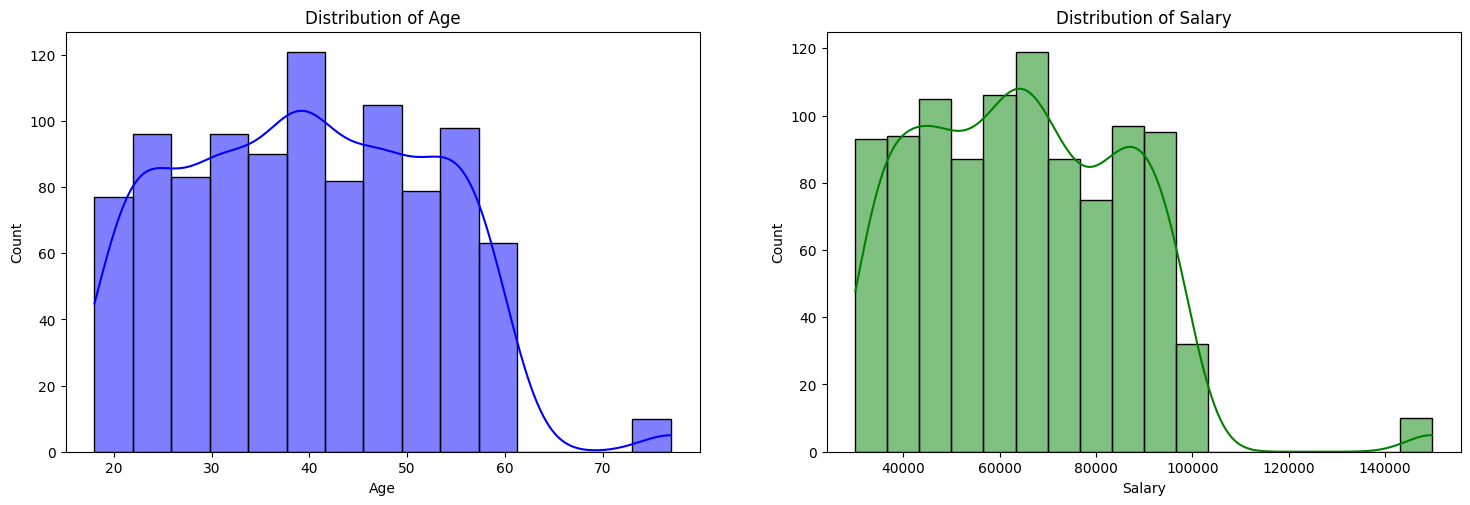

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
df_eda = df

# Setting up the plotting area
plt.figure(figsize=(18, 12))


## Distribution of numerical columns
plt.subplot(2, 2, 1)
sns.histplot(df_eda['Age'], kde=True, color='blue')
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(df_eda['Salary'], kde=True, color='green')
plt.title('Distribution of Salary')

## Inventory Imbalance:
-> The majority of employees fall within a certain age and salary range, but a few have significantly higher values.

##  Salary Distribution:
-> Most employees have mid-range salaries, but a few have exceptionally high salaries, indicating possible salary gaps.

##  Presence of Outliers:
->Extreme values in both Age and Salary suggest potential outliers that may require further investigation.




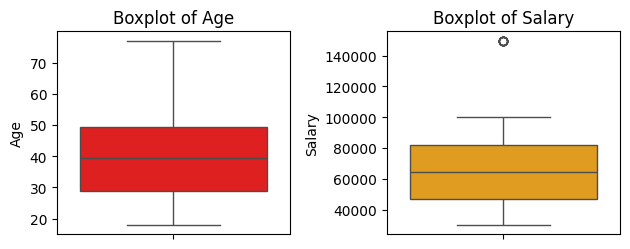

In [24]:
## Boxplots to visualize outliers
plt.subplot(2, 2, 3)
sns.boxplot(y=df_eda['Age'], color='red')
plt.title('Boxplot of Age')

plt.subplot(2, 2, 4)
sns.boxplot(y=df_eda['Salary'], color='orange')
plt.title('Boxplot of Salary')
plt.tight_layout()
plt.show()

## Presence of Outliers:

1. Both Age and Salary have outliers (points beyond the whiskers).
2. This suggests that some employees have significantly higher ages or salaries compared to the majority.

## Skewed Distributions:

1. The data is right-skewed, with most values concentrated in the lower range and a few extreme values pulling the distribution upward.

## Narrow Interquartile Range (IQR):

1. The middle 50% of the data is tightly packed, indicating that most employees have similar ages and salaries..

## Significant Gap Between Typical Values and Outliers:

1. The majority of employees fall within a standard range.
2. However, some individuals have exceptionally high salaries or ages, which may require further analysis.


##Handling ouliers using IQR(Inter Quartile Range)

In [33]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Checking for outliers before removal
print("Outliers in Age:", detect_outliers_iqr(df_eda['Age']).values)
print("Outliers in Salary:", detect_outliers_iqr(df_eda['Salary']).values)

# Removing outliers
df_cleaned = remove_outliers(df_eda, 'Salary')
df_cleaned = remove_outliers(df_cleaned, 'Age')

Outliers in Age: []
Outliers in Salary: [149726. 149726. 149726. 149726. 149726. 149726. 149726. 149726. 149726.
 149726.]


## Checking if the outliers are removed successfully using histogram and boxplot

Text(0.5, 1.0, 'Distribution of Salary')

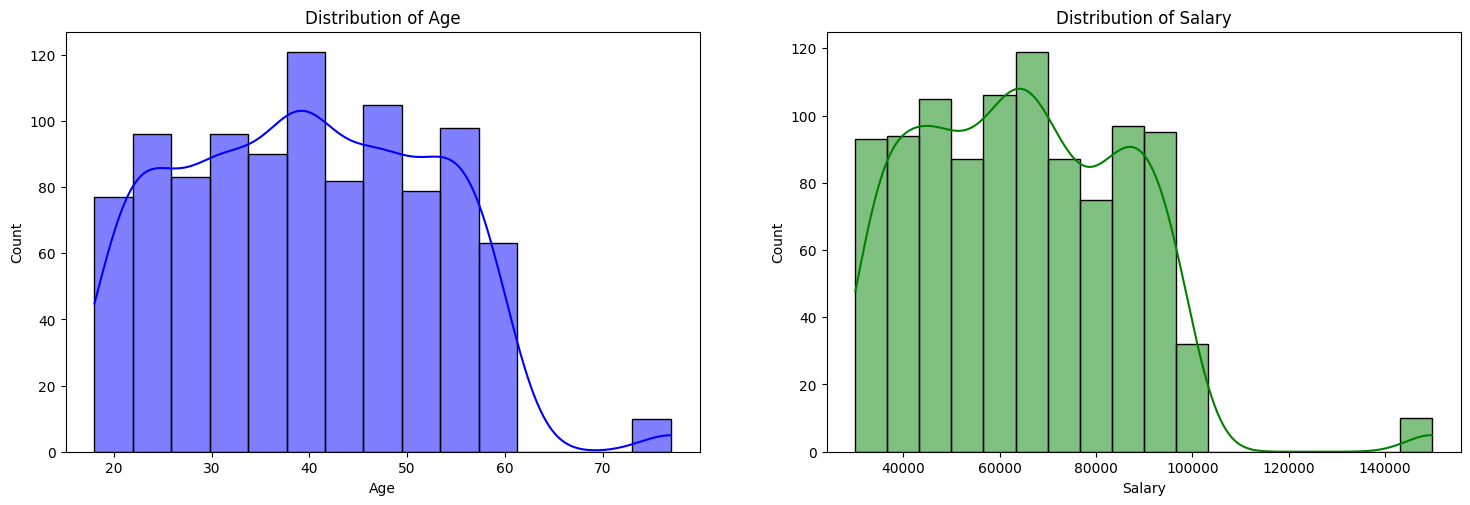

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
df_eda = df

# Setting up the plotting area
plt.figure(figsize=(18, 12))


## Distribution of numerical columns
plt.subplot(2, 2, 1)
sns.histplot(df_eda['Age'], kde=True, color='blue')
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(df_eda['Salary'], kde=True, color='green')
plt.title('Distribution of Salary')

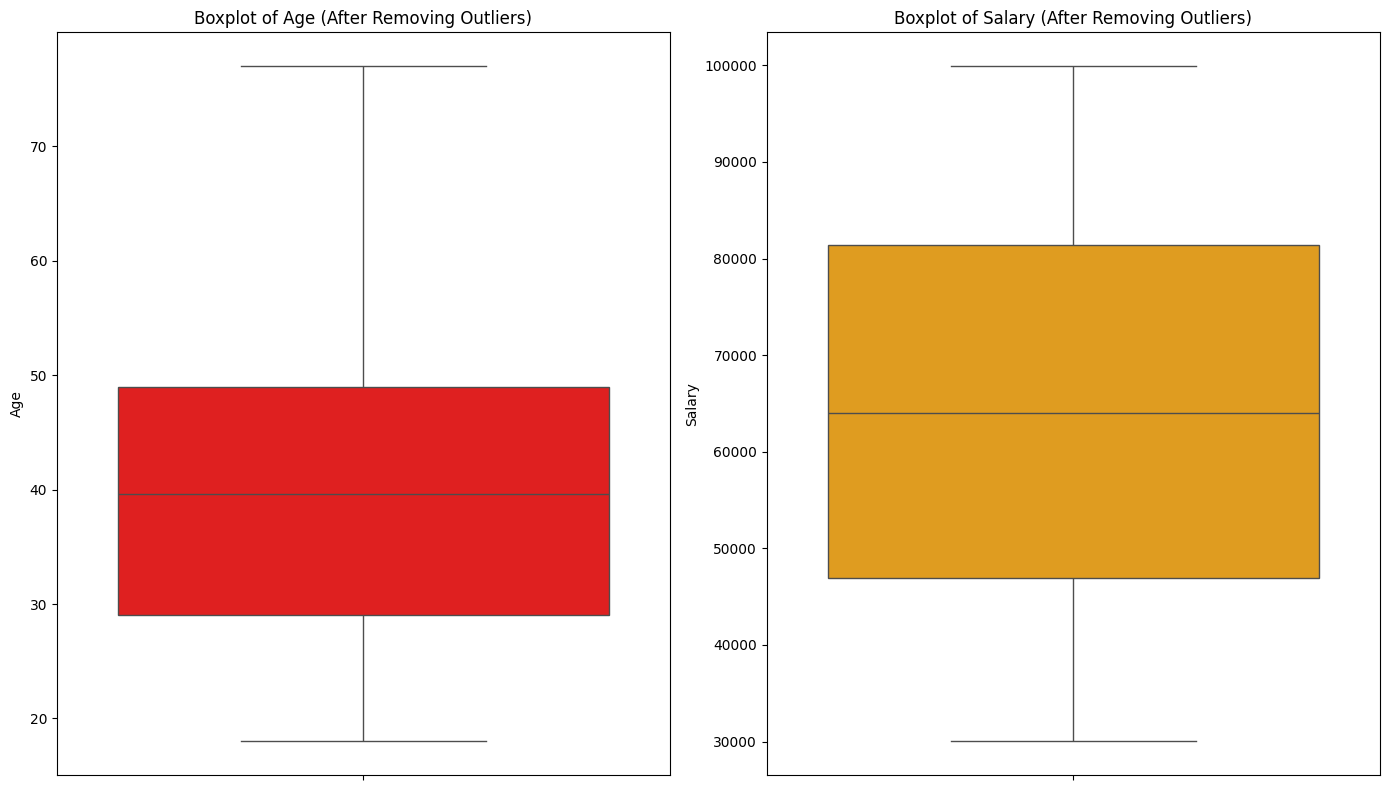

In [27]:
# Checking if outliers are removed
plt.figure(figsize=(14, 8))

# Boxplot for Age (After Removing Outliers)
plt.subplot(1, 2, 1)
sns.boxplot(y=df_cleaned['Age'], color='red')
plt.title('Boxplot of Age (After Removing Outliers)')

# Boxplot for Salary (After Removing Outliers)
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Salary'], color='orange')
plt.title('Boxplot of Salary (After Removing Outliers)')

plt.tight_layout()
plt.show()

## Exploring the project
#  Visualize Age and Salary distribution to make some conclusion.
--> Histogram and Kernel Density Estimate(KDE)

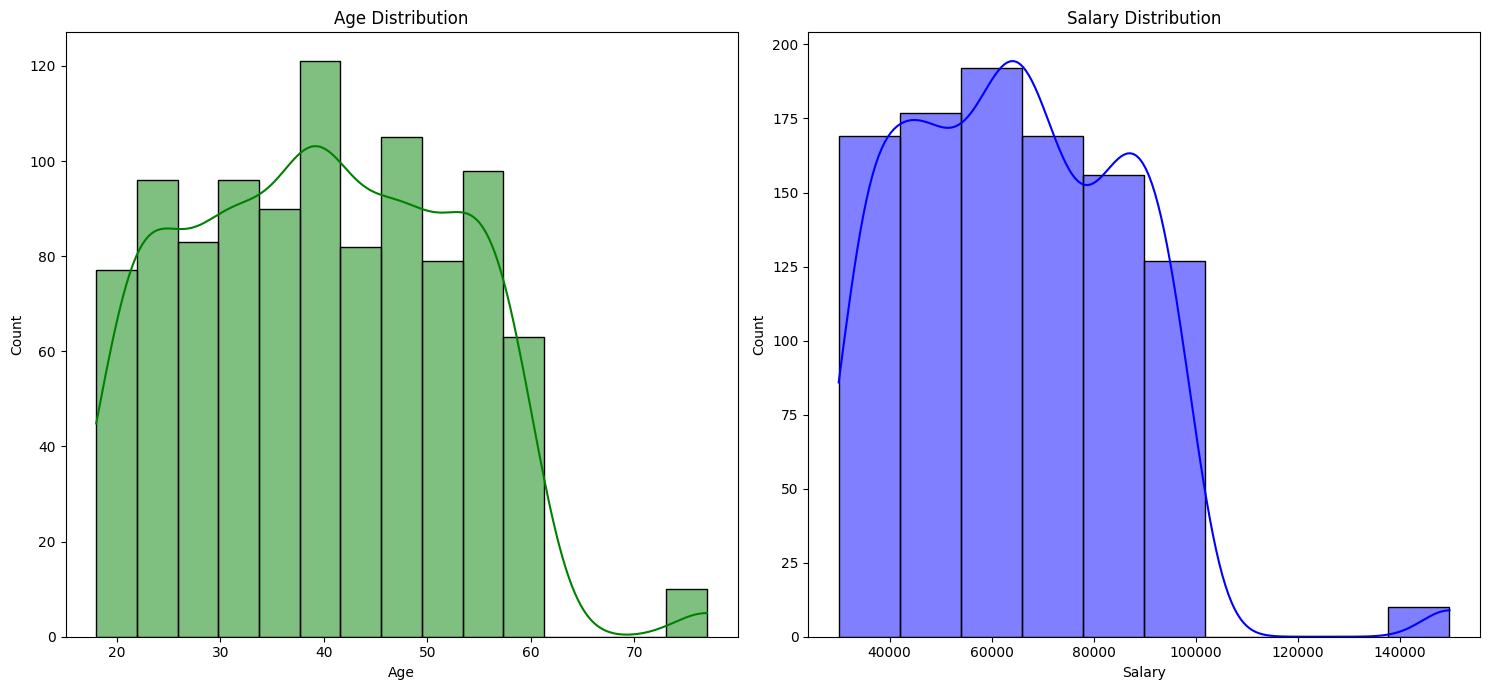

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
# Age Histogram
plt.subplot(121)
sns.histplot(data=df, x='Age', bins=15, kde=True, color='g')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Salary Histogram
plt.subplot(122)
sns.histplot(data=df, x='Salary', bins=10, kde=True, color='b')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Multivariate analysis using pieplot

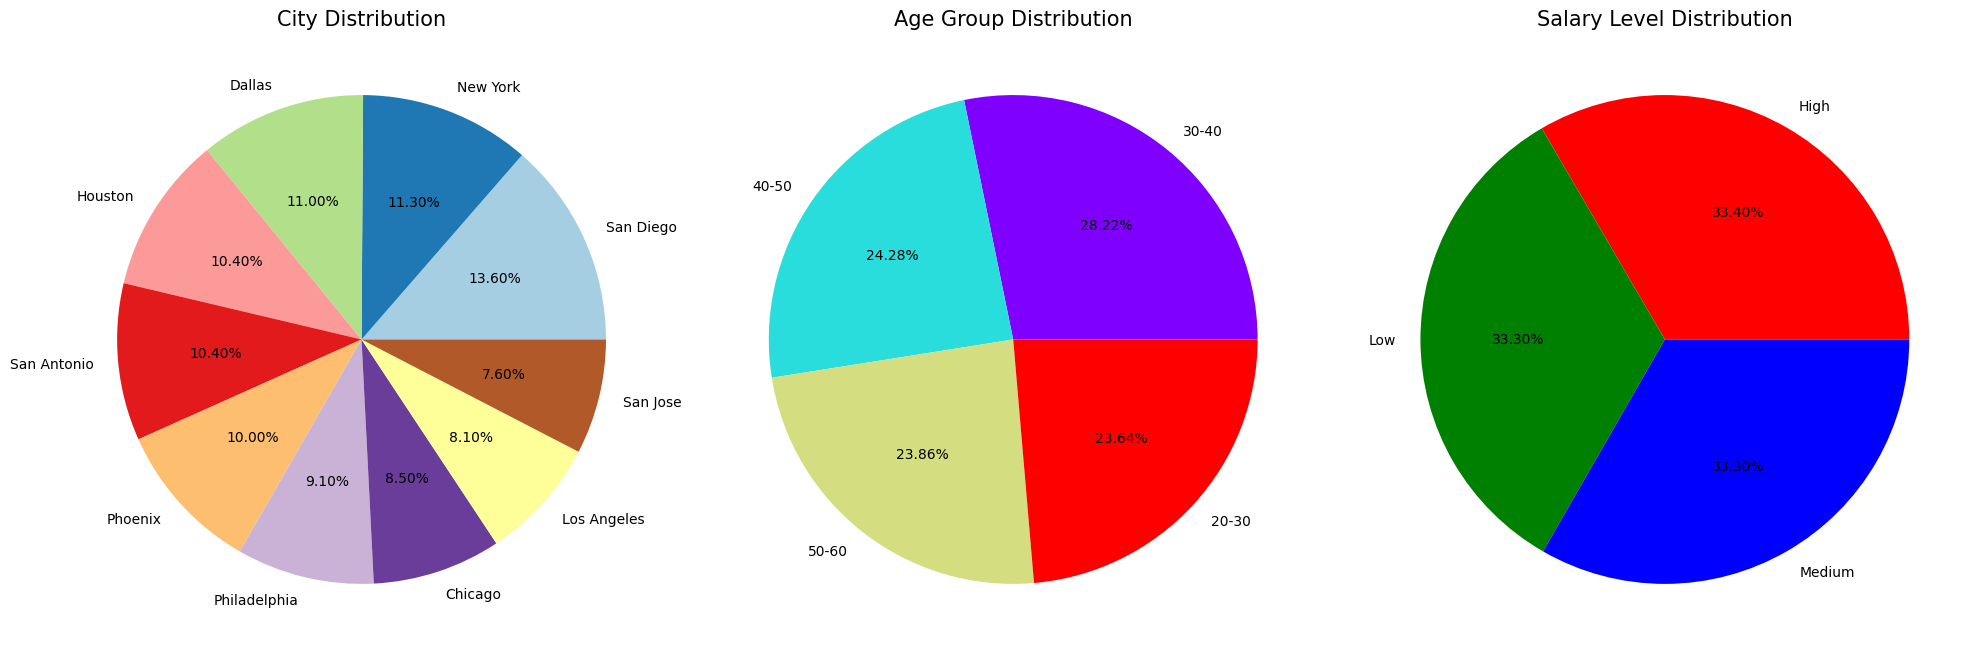

In [29]:
## Multivariate analysis using pieplot

# Categorizing Salary Levels
df['Salary_Level'] = pd.qcut(df['Salary'], q=3, labels=['Low', 'Medium', 'High'])

# Categorizing Age Groups
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])

# Setting Figure Size
plt.rcParams['figure.figsize'] = (20, 7)

# Pie Chart for City Distribution
plt.subplot(1, 3, 1)
size = df['City'].value_counts()
labels = size.index
colors = plt.cm.Paired(np.linspace(0, 1, len(labels)))
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('City Distribution', fontsize=15)
plt.axis('off')

# Pie Chart for Age Groups
plt.subplot(1, 3, 2)
size = df['Age_Group'].value_counts()
labels = size.index
colors = plt.cm.rainbow(np.linspace(0, 1, len(labels)))
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Age Group Distribution', fontsize=15)
plt.axis('off')

# Pie Chart for Salary Levels
plt.subplot(1, 3, 3)
size = df['Salary_Level'].value_counts()
labels = size.index
colors = ['red', 'green', 'blue']
plt.pie(size, colors=colors, labels=labels, autopct='%1.2f%%')
plt.title('Salary Level Distribution', fontsize=15)
plt.axis('off')

plt.tight_layout()
plt.show()

### UNIVARIATE ANALYSIS

Text(0.5, 1.0, 'Employee Count by City')

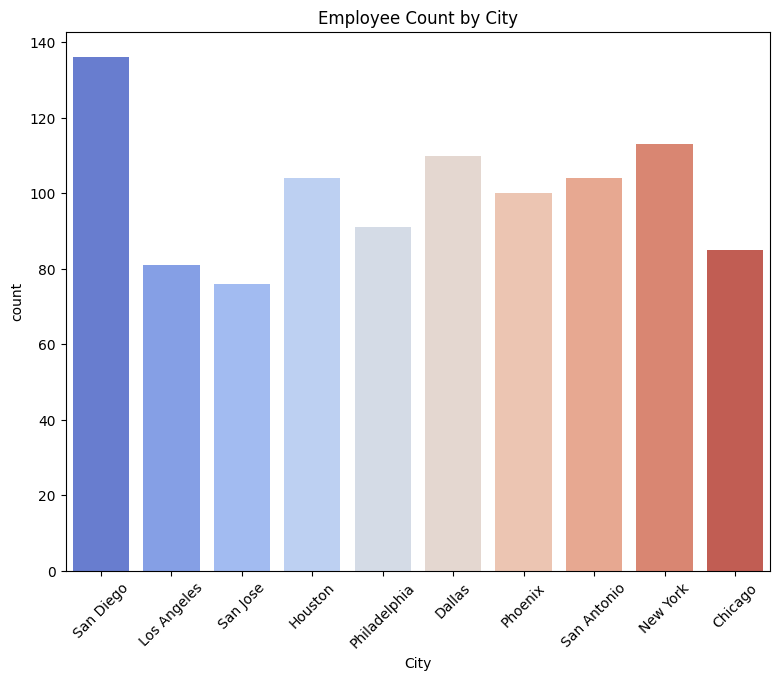

In [30]:
plt.subplot(1, 2, 1)
sns.countplot(x=df['City'], palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Employee Count by City')

Bivariate Analysis

Text(0, 0.5, 'Salary')

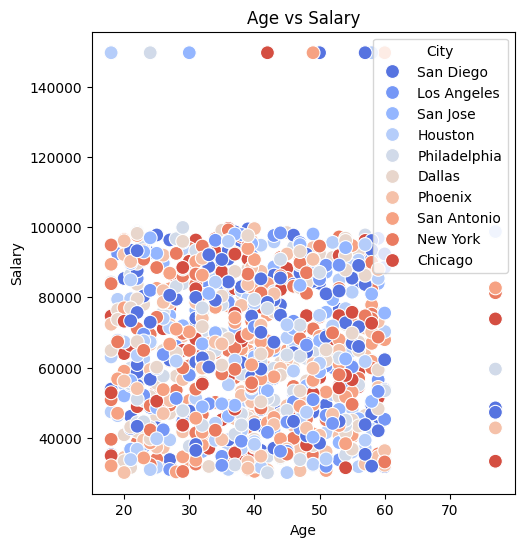

In [31]:
plt.figure(figsize=(12, 6))

# Scatter Plot (Age vs Salary)
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Age'], y=df['Salary'], hue=df['City'], palette='coolwarm', s=100)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')


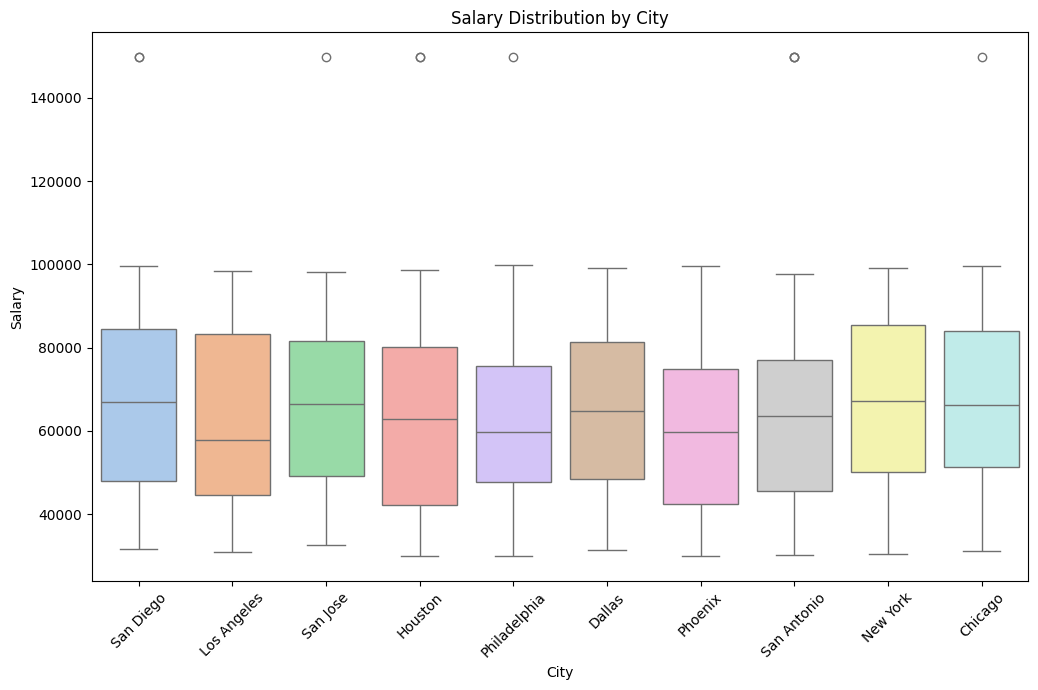

In [32]:
# Box Plot (Salary by City)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['City'], y=df['Salary'], palette='pastel')
plt.xticks(rotation=45)
plt.title('Salary Distribution by City')
plt.tight_layout()
plt.show()